# 初期設定

In [1]:
from typing import Final
from enum import Enum

from matplotlib import pyplot as plt
from PIL import Image

In [2]:
GOOD_IMAGE_PATH: Final[str] = "../data/good"
STOP_IMAGE_PATH: Final[str] = "../data/yellow"
ABNORMALITY_IMAGE_PATH: Final[str] = "../data/red"

In [3]:
class ImageType(Enum):
    GOOD = 1
    STOP = 2
    ABNORMALITY = 3

# util系

In [4]:
def read_iamge(image_type: ImageType, file_name: str) -> None:
    if image_type == ImageType.GOOD:
        image_folder = GOOD_IMAGE_PATH
    elif image_type == ImageType.STOP:
        image_folder = STOP_IMAGE_PATH
    elif image_type == ImageType.ABNORMALITY:
        image_folder = ABNORMALITY_IMAGE_PATH
    else:
        raise FileNotFoundError
    
    return Image.open(f"{image_folder}/{file_name}.jpg")

def show_RGB_info(img):
    RGB_info = img.getextrema()
    print(f"Red: {RGB_info[0]}, Green: {RGB_info[1]}, Blue: {RGB_info[2]}")

def crop_image(image):
    return image.crop((70, 18, 260, 325))

def show_color_hist(image):
    hist = image.histogram()

    bands = image.getbands()
    print(len(hist))

    # チャンネル数
    ch = len(bands)

    # グラフの表示色
    if (ch == 1):
        colors = ["black"]
    else:
        colors = ["red", "green", "blue", "black"]

    # ヒストグラムをmatplotlibで表示
    x = range(256)
    for col in range(ch):
        y = hist[256 * col : 256 * (col + 1)]
        plt.plot(x, y, color = colors[col], label = bands[col])

    # 凡例の表示
    plt.legend(loc=2)

    plt.show()

def get_last_hist_value(image) -> dict:
    hist_dict = dict()
    hist = image.histogram()
    hist_dict["R"] = hist[:256]
    hist_dict["G"] = hist[256:512]
    hist_dict["B"] = hist[512:]

    hist_last_value_dict = {"R": hist_dict["R"][-1],
                            "G": hist_dict["G"][-1],
                            "B": hist_dict["B"][-1]}
    
    return hist_last_value_dict

# 画像の確認

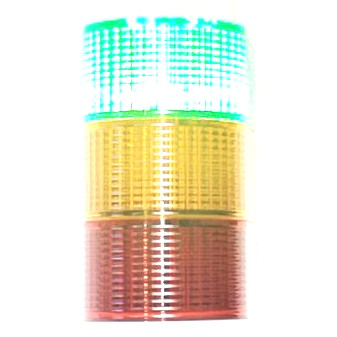

In [17]:
good_iamge = read_iamge(ImageType.GOOD, "o001")
good_iamge

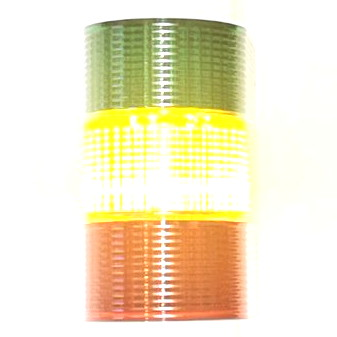

In [18]:
stop_iamge = read_iamge(ImageType.STOP, "n001")
stop_iamge

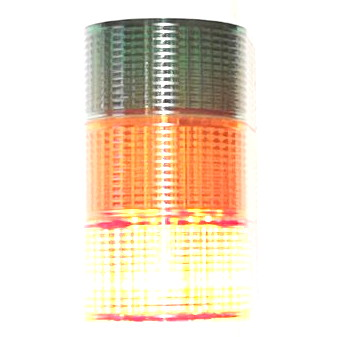

In [19]:
abnormality_iamge = read_iamge(ImageType.ABNORMALITY, "n001")
abnormality_iamge

# 画像の分析

## 各色の分析

In [20]:
show_RGB_info(good_iamge)
show_RGB_info(stop_iamge)
show_RGB_info(abnormality_iamge)

Red: (0, 255), Green: (53, 255), Blue: (30, 255)
Red: (79, 255), Green: (78, 255), Blue: (0, 255)
Red: (39, 255), Green: (36, 255), Blue: (0, 255)


768


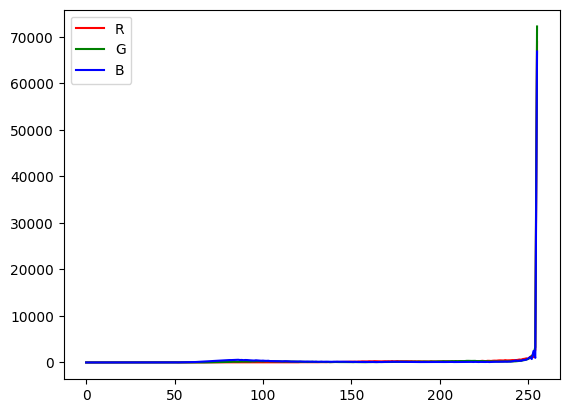

768


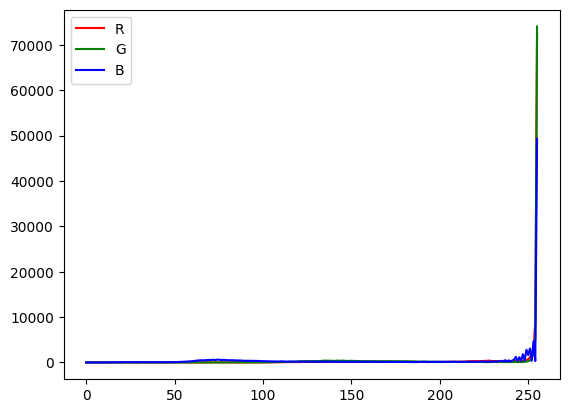

768


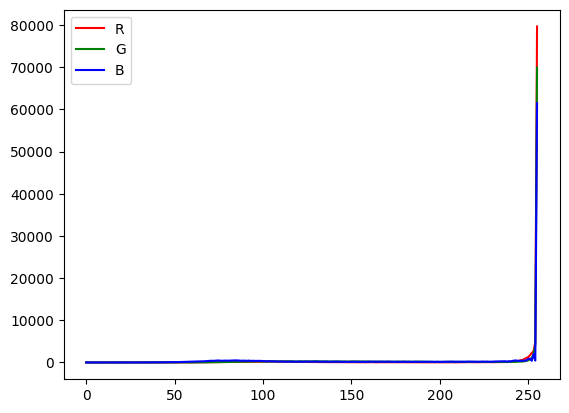

In [21]:
show_color_hist(good_iamge)
show_color_hist(stop_iamge)
show_color_hist(abnormality_iamge)

# イマイチ差が分からないのでCropして白成分を少なくする

## 切り抜き
白成分が多すぎるため

In [22]:
croped_goot_image = crop_image(good_iamge)
croped_stop_image = crop_image(stop_iamge)
croped_abnormality_iamge = crop_image(abnormality_iamge)

768


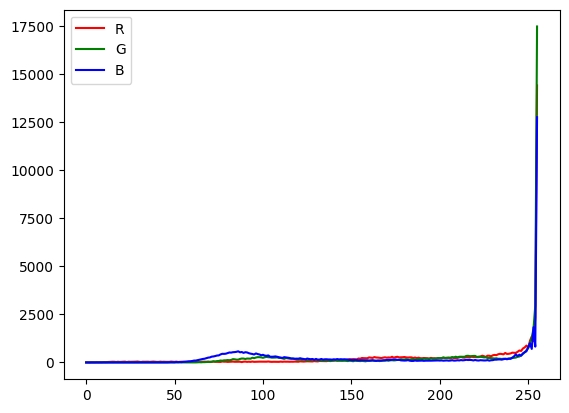

768


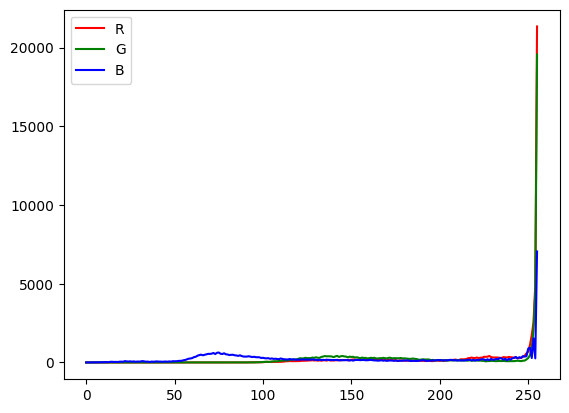

768


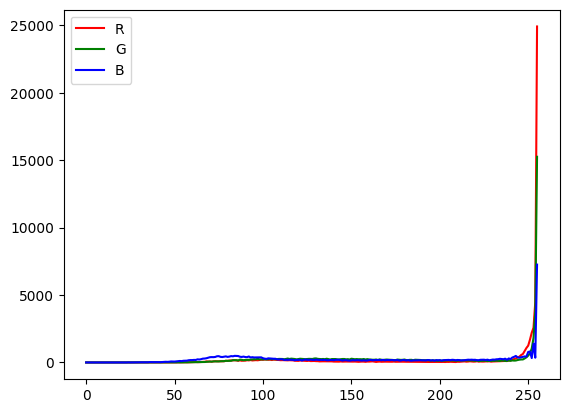

In [23]:
show_color_hist(croped_goot_image)
show_color_hist(croped_stop_image)
show_color_hist(croped_abnormality_iamge)

# good →　Greenの成分が一番大きい
# stop -> GreenとRed成分が同じぐらい
# abnormality -> Red成分が断トツで多い

## 最終値の取得

In [60]:
last_value_dict = get_last_hist_value(croped_goot_image)
print(last_value_dict)

{'R': 14405, 'G': 17468, 'B': 12751}


# 実際に予測してみる

In [28]:
image = read_iamge(ImageType.STOP, "n010")
color_value_dict = get_last_hist_value(image=image)
print(color_value_dict)

# 大きい順に並び替え
sorted_value_dict = sorted(color_value_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_value_dict)

# 1番最初がGreenだとgood
if sorted_value_dict[0][0] == "G":
    print(ImageType.GOOD)

# GreenとRedの成分を比較
red_value = sorted_value_dict[0][1]
green_value = sorted_value_dict[1][1]
# 差が大きければgood, それ以外であればstop
diff_value = red_value - green_value
if diff_value > 5000:
    print(ImageType.ABNORMALITY)
else:
    print(ImageType.STOP)


{'R': 74210, 'G': 73430, 'B': 55002}
[('R', 74210), ('G', 73430), ('B', 55002)]
ImageType.STOP
